<a href="https://colab.research.google.com/github/JonathaCosta/3_SmartGrid/blob/main/AEL/AEL2_AnaliseEnergeticaLocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do potencial energético na cidade de Fortaleza no intervalo de 5 anos e previsão para ano seguinte

**Métodos utilizados**: 
*   Séries Temporais
*   *Machine Learning* 
*   Rede Neural Recorrente



## Etapa 01 - Análise de dados

Importar dados, tratar, converter em DataFrame e realizar análise prévia numérica e gráfica.

### Importação, tratamento e conversão


Fonte: https://tempo.inmet.gov.br/TabelaEstacoes/82397#

In [17]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
''' Importa os dados de 2021-2017, atualiza o index para data e altera os nomes das colunas '''
# Datasets
a='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2017_FORTALEZA(A305).csv'
b='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2018_FORTALEZA%20(A305).csv'
c='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2019_FORTALEZA%20(A305).csv'
d='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2020_FORTALEZA%20(A305).csv'
e='https://raw.githubusercontent.com/JonathaCosta/3_SmartGrid/main/Datasets/2021_FORTALEZA%20(A305).csv'

dados=pd.DataFrame()
for i in ([a,b,c,d,e]):
  df = pd.read_csv(i, sep=';',header=1,index_col='Data', decimal=',', parse_dates=True,infer_datetime_format=True)
  dados = pd.concat([dados,df])

dados.drop(dados.columns[-1],axis=1,inplace=True)
dados.rename(columns={'Hora (UTC)':'hora', 'Temp. Ins. (C)':'tinst', 'Temp. Max. (C)': 'tmax', 'Temp. Min. (C)':'tmin',
       'Umi. Ins. (%)': 'uinst', 'Umi. Max. (%)':'umax', 'Umi. Min. (%)':'umin',
       'Pto Orvalho Ins. (C)':'poinst', 'Pto Orvalho Max. (C)':'pomax', 'Pto Orvalho Min. (C)':'pomin',
       'Pressao Ins. (hPa)':'pinst', 'Pressao Max. (hPa)':'pmax', 'Pressao Min. (hPa)':'pmin',
       'Vel. Vento (m/s)':'velven', 'Dir. Vento (m/s)':'dirven', 'Raj. Vento (m/s)':'rajven',
       'Radiacao (KJ/m²)':'radiacao', 'Chuva (mm)':'chuva'},inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42312 entries, 2017-01-01 to 2021-10-29
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      42312 non-null  int64  
 1   tinst     39602 non-null  float64
 2   tmax      39589 non-null  float64
 3   tmin      39589 non-null  float64
 4   uinst     39602 non-null  float64
 5   umax      39589 non-null  float64
 6   umin      39589 non-null  float64
 7   poinst    39602 non-null  float64
 8   pomax     39589 non-null  float64
 9   pomin     39589 non-null  float64
 10  pinst     39602 non-null  float64
 11  pmax      39589 non-null  float64
 12  pmin      39589 non-null  float64
 13  velven    39601 non-null  float64
 14  dirven    39601 non-null  float64
 15  rajven    39582 non-null  float64
 16  radiacao  23282 non-null  float64
 17  chuva     39602 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 6.1 MB


In [19]:
def AnaliseRadiacao(df):
  '''Função receba um DF em timeseries e retorna os gráficos da radiacao acumulada por períodos '''
  period = {'D':'diário','W':'semanal','M':'mensal','Y':'anual'}
  plt.figure(figsize=(30,10))

  for i,j in enumerate(period):
    a = df.resample(j).radiacao.sum()/1e3
    plt.subplot(2,2,i+1)
    a.plot()
    plt.ylabel('MJ/m²')
    plt.title('Período '+ period[j])
    plt.grid()
    

## Análise pontual de 2020

O filtro do índice de ano no formato data pode ser feito via:


*   df.loc['2020-01-01':'2020-12-31']

*   import datetime 
    df.loc[datetime.date(year=2020,month=1,day=1) : datetime.date(year=2020,month=12,day=31)]

*    df.loc['2020-01-01':'2020-12-31'] 

*    df.query('20200101 < Data < 20201231')


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


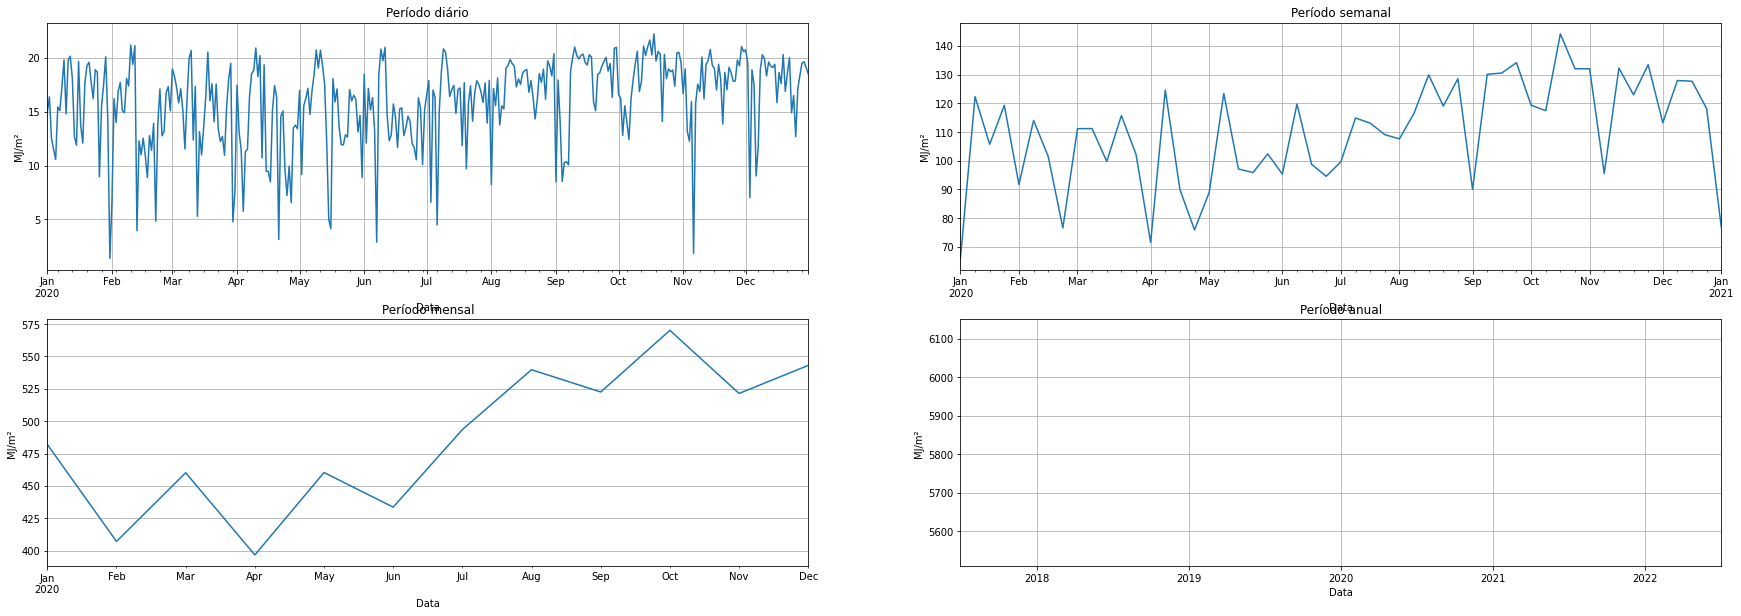

In [20]:
df = dados.loc['2020-01-01':'2020-12-31']
AnaliseRadiacao(df)

### Análise de distribuição de frequências no ano 2020

Text(0, 0.5, 'Radiação acumulada mensal (KJ/m²)')

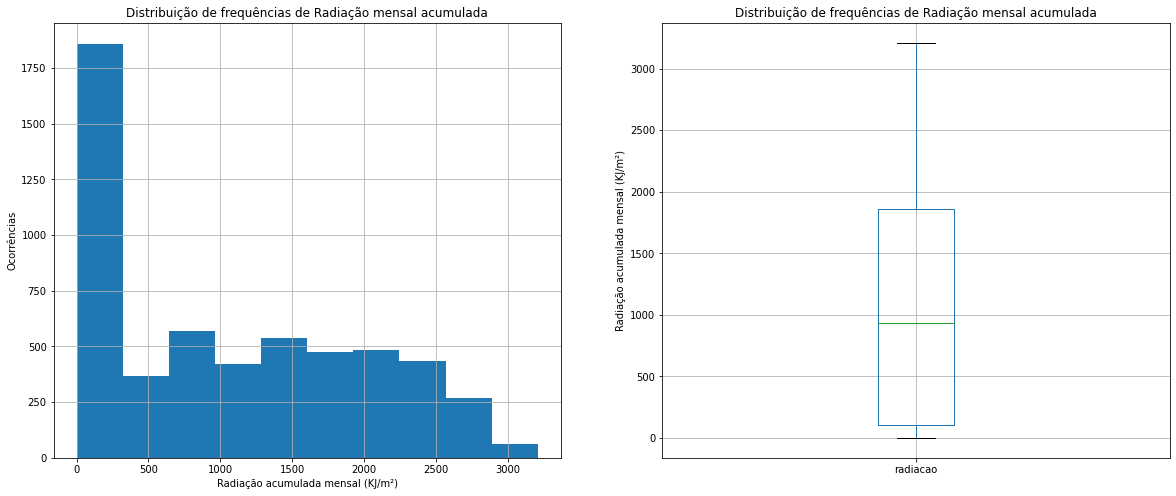

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df.radiacao.hist()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.xlabel('Radiação acumulada mensal (KJ/m²)')
plt.ylabel('Ocorrências')

plt.subplot(1,2,2)
df.radiacao.plot(kind='box')
plt.grid()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.ylabel('Radiação acumulada mensal (KJ/m²)')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uinst   8777 non-null   float64
 1   tinst   8777 non-null   float64
 2   velven  8777 non-null   float64
 3   chuva   8777 non-null   float64
dtypes: float64(4)
memory usage: 343.1 KB


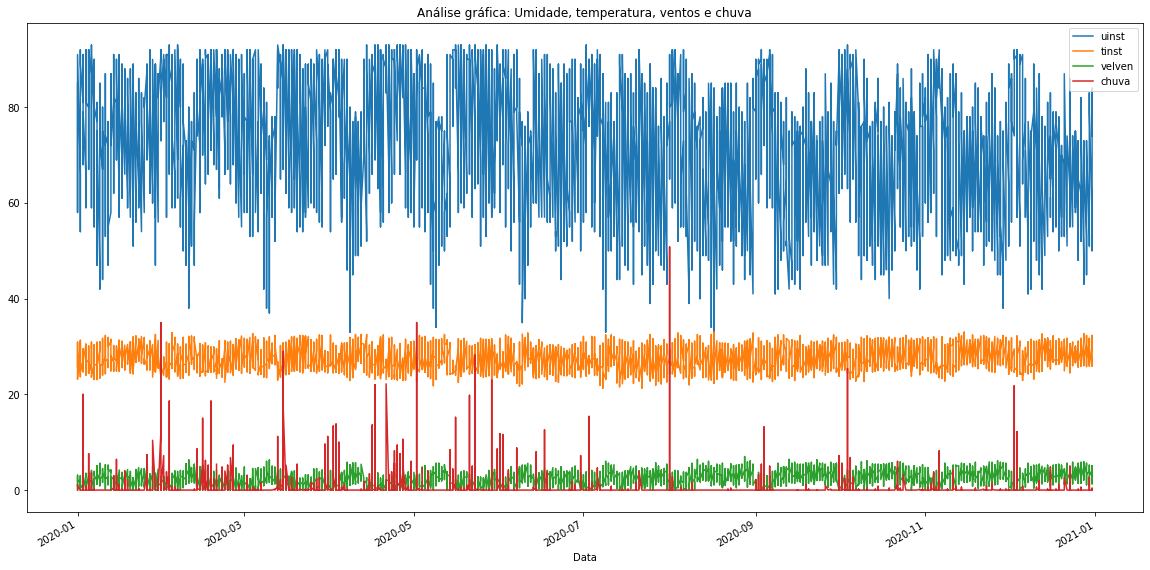

In [22]:
df1 = df.loc[:,['uinst','tinst','velven','chuva']]
df1.plot(figsize=(20,10))
plt.title('Análise gráfica: Umidade, temperatura, ventos e chuva')
df1.info()

## Correlação entre variáveis



### Correlação direta entre as variáveis: Umidade instantânea, Temperatura instantânea, Velocidade do vento e chuva.

df1 é um DataFrame referente ao ano de 2020.

In [23]:
df1.corr()

,uinst,tinst,velven,chuva
uinst,1.000000,-0.854592,-0.830048,0.186361
tinst,-0.854592,1.000000,0.675263,-0.160552
velven,-0.830048,0.675263,1.000000,-0.075792
chuva,0.186361,-0.160552,-0.075792,1.000000


# ***RESPOSTAS***
Resposta à primeira provocação:
Correlação entre : 
* Radiação, chuva e ventos
* Umidade, a temperatura e a radiação?
* Umidade e os ventos e a temperatura?

In [24]:
df[['radiacao','chuva','velven']].corr()

,radiacao,chuva,velven
radiacao,1.00000,-0.158000,0.737720
chuva,-0.15800,1.000000,-0.075792
velven,0.73772,-0.075792,1.000000


In [25]:
df[['radiacao','uinst','tinst']].corr()

,radiacao,uinst,tinst
radiacao,1.000000,-0.849766,0.882064
uinst,-0.849766,1.000000,-0.854592
tinst,0.882064,-0.854592,1.000000


In [26]:
df[['velven','uinst','tinst']].corr()

,velven,uinst,tinst
velven,1.000000,-0.830048,0.675263
uinst,-0.830048,1.000000,-0.854592
tinst,0.675263,-0.854592,1.000000


In [27]:
df[['radiacao','chuva','velven','tinst','uinst']].corr()


,radiacao,chuva,velven,tinst,uinst
radiacao,1.000000,-0.158000,0.737720,0.882064,-0.849766
chuva,-0.158000,1.000000,-0.075792,-0.160552,0.186361
velven,0.737720,-0.075792,1.000000,0.675263,-0.830048
tinst,0.882064,-0.160552,0.675263,1.000000,-0.854592
uinst,-0.849766,0.186361,-0.830048,-0.854592,1.000000
